# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [2]:
raw_data = pd.read_csv('Admittance.csv')
data = raw_data.copy()
data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Declare the dependent and the independent variables

In [3]:
y = data['Admitted']
x1 = data['SAT']

## Regression

In [4]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


Function value shows the value of the objective function at 10th iteration. We need that because after a certain number of iteration there is a possibility that the model wont learn the relationship. Hence it cannot optimize the optimization function.

## Summary

In [5]:
# Get the regression summary
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:                  0.7992
Time:                        08:26:09   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Describe MLE:
Maximum Likelihood Estimation is a likelihood function that estimates how likely it is that the model at hand describes the real underlying relationship of the variables. 

The bigger the likelihood function, the higher the probability that our model is correct!

MLE tries to maximize the likelihood function.

The computer is going through different values, until it finds a model, for which the likelihood is the highest. 

When it can no longer improve it, it will just stop the optimization. 

#### Log-Likelihood

The value of the log likelihood is almost but not always negative, the bigger the better. 

#### LL-Null:
The log-likelihood of a model which has no independent variables.
${y} = \hat{\beta}_{0} * 1 $


## Looking into LL-null

In [6]:
# Create a variable only of 1s
const = np.ones(168)
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
reg_null = sm.Logit(y,const)
results_null = reg_null.fit()
results_null.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:               7.410e-11
Time:                        08:42:54   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

LL-Null for both is the same. We use the LL-null to see if our model has any explanatory power. 

#### LLR:
Just like there is F-statistic in Linear Regression, there is LLR in Logistic Regression. Log Likelihood Ratio measures if our model is statistically different from LL-null, aka a useless model. 

#### Pseudo R-squared:
(McFadden's R-squared in this case). A good pseudo R-squared is somewhere between 0.2 and 0.4. This measure is mostly useful for comparing variations of the same model. 

Different models will have completely different and incomparable Pseudo R-squares. 

#### Coefficients:
$log({\frac{\pi}{1-\pi})} = -69.91+0.042*SAT $

${\pi}$ - > Probability of an event occuring

${1-\pi}$ - > Probability of an event not occuring 

$\frac{\pi}{1-\pi}$ -> Odds

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


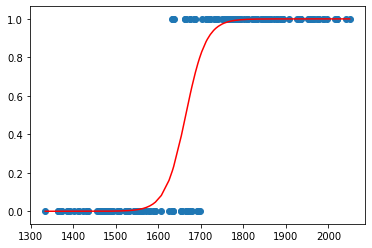

<Figure size 1440x1440 with 0 Axes>

In [8]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
ax = plt.scatter(x1,y,color='C0')
#plt.xlabel('SAT', fontsize = 20)
#plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
ax2 = plt.plot(x_sorted,f_sorted,color='red')
plt.figure(figsize=(20,20))
plt.show()

In [9]:
np.exp(4.20)

66.68633104092515